# MNIST FASHION


In [1]:

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.models import Model
import cv2

2024-01-11 11:07:55.989773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ngoni/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the Fashion Mnist Data Set
mnist_images = keras.datasets.fashion_mnist

#Divide into training set and test sets
#.load_data returns two tuples. First one contains an array of images(matrices) for training and second one is an array of images for testing
#Each tuple contains two elements, first is the array of images and second is that of corresponding labels
#X_train, X_test: These typically represent the feature matrices of the training and test datasets, respectively. "X" usually denotes input features.
#y_train, y_test: These represent the corresponding labels or target values for the training and test datasets. "y" usually denotes output labels.
(X_train, y_train), (X_test, y_test) = mnist_images.load_data()



In [3]:
import numpy as np


In [4]:
#!pip install --upgrade --force-reinstall tensorflow


In [5]:
#The images in the fashion MNIST dataset are greyscale where each pixel value is between 0 and 255. To normalise the dataset, the MNIST image pixels are divided by 255.0.
X_train, X_test = X_train/255.0, X_test/255.0


In [6]:
#returns the following tuple(number of images, image width in terms of number of pixels, image height)
print(X_train.shape)

(60000, 28, 28)


In [7]:
image_data = X_test[5]

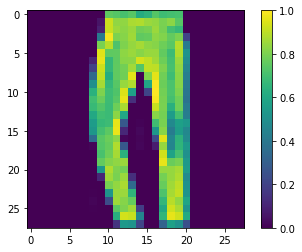

In [8]:
#create a new window/container/figure to draw in
plt.figure()

#displays the image located at index 5 of the X test array
plt.imshow(image_data)

#adds a colour bar to the plot
plt.colorbar()

#Turns off grid lines
plt.grid(False)

#Displays entire plot or entire visualization and without it, the plot would not be shown
#note this is not a traditional photograph but rather a representation of pixel data.
#The function imshow inteprets numerical values in the array as intensity values and assigns colours accordingly
plt.show()

In [9]:
#You need to reshape the image into something similar to an actual photograph using cv2. .reshape(height, width, channels.)
#RGB = 3 CHANNELS AND grey = one channel
image = image_data.reshape(28, 28, 1)

In [10]:
#This opens a new window with the title reshaped image
cv2.imshow('Reshaped Image', image)
#cv2.waitKey(delay): This is for leaving the image window open until a key is pressed. After the key is pressed,
#it waits for the delay(millseconds) until it closes the window
cv2.waitKey(0)

#used to destroy all OpenCV windows that are currently open
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
#You have seen earlier that the training and test set is currently in the form of (samples x height x width). 
#However, a CNN in TensorFlow Keras expects input training images in the format (height x width x number of colour 
#channels). Currently, we do not have a colour channel axis in our input images. The following script adds colour 
#channel axes to the images in the training and test sets.

In [11]:
#np.expand_dims adds another dimension to an array. If it was 2D, its now 3D. i.e (if it was row x col) its now (row by col by height)
#array is not necessarily a matrix
#-1 just means add a new dimension at the end of the array and the entries of that dimension is 1
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
#just to see how the shape of one image is looking
print(X_train[0].shape)

(28, 28, 1)


In [13]:
#label encoding
#labels are represented as labels and set extracts the unique labels from y_train
#y_train is one dimensional array containing the labels of all the information
#There should be a key else where to determine what each label correspond to.
outputs = set(y_train)
print(outputs)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [14]:
#We are going to define our model.

#This layer is defined with the shape of the input data. 
#So you can just take one image and pass in its shape as the shape argument of the Input functions
inp_layer = Input(shape = X_train[0].shape )

#convulutional layers
#This layer is the first convulutional layer with 32 filters of 3by3. This just means 32 different matrices of size 3x3
#At one time, each matrix/filter acts as a feature detector and slides/convolves accross the input data to produce feature maps
#Stride defines the number of pixels by which the filter shifts
#activation introduce non-linearity
#note the syntax. We basically sauing lets apply the convulution to the input layer and we get feature maps
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(inp_layer)

#downsampling operation that reduces spatial dimensions(width and height) of the feature maps using a 2 x 2 pooling window
#The result is a new set of downsample feature maps and eachmap has half the spatial dimenstions(width and height) compared to the input feature maps
#Max-pooling helps in reducing the spatial resolution, retaining the most important information, and making the subsequent layers focus on more significant features.
#Its called max pooling coz it takes the maximum in each window
maxp1 = MaxPool2D(2, 2)(conv1)

#convolution layer 2 doing the same thing as conv1. Only diff is that we have 64 filters
#Increasing the number of filters in deeper layers allows the network to capture more complex and abstract 
#features. However, it also increases the computational cost. It's a common practice to gradually increase the 
#number of filters in deeper layers to capture higher-level representations of the input data
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxp1)

#Pooling layers, such as MaxPooling or AveragePooling, are commonly used in CNNs to reduce the spatial dimensions (width and height) of the feature maps, which helps in controlling overfitting, reducing computational complexity, and increasing the receptive field.
#In many architectures, after convolutional layers, there's a trade-off between retaining spatial information 
#and reducing dimensionality. The absence of pooling after certain convolutional layers might imply that the 
#model is trying to preserve more spatial information at that stage, allowing the subsequent layers to work with 
#more detailed feature maps.

#Instead of pooling, the code you mentioned might directly flatten the output of the last convolutional layer (conv2) to feed it into fully connected layers (Dense). This could be a design choice aimed at preserving spatial information up to a certain depth before transitioning to fully connected layers for high-level reasoning and classification.
"""conv2: This represents the output tensor or feature map produced by the second convolutional layer in your neural network. The convolutional layers learn hierarchical features from the input data.
Flatten(): This is a layer in the neural network architecture responsible for converting the multi-dimensional tensor or feature map into a one-dimensional array. It essentially flattens the spatial dimensions of the input.
(conv2): The (conv2) part is a functional API syntax in Keras (a high-level neural networks API running on top of TensorFlow). It means applying the Flatten layer to the output of conv2.
So, the line flat1 = Flatten()(conv2) takes the output of the second convolutional layer (conv2), which is a multi-dimensional tensor, and flattens it into a one-dimensional array. This flattened array can then be used as input to subsequent layers, such as fully connected (dense) layers, in your neural network.
Flattening is often necessary when transitioning from convolutional layers to dense layers, as fully connected layers require one-dimensional input. The flattened representation serves as a feature vector that can be used for further processing or classification tasks."""


"""A tensor is a mathematical object that generalizes the concept of scalars, vectors, and matrices. In the context of deep learning and neural networks, tensors usually refer to multi-dimensional arrays. A tensor can be a scalar (0D tensor), a vector (1D tensor), a matrix (2D tensor), or have more dimensions.
A feature map, on the other hand, is a term commonly used in the context of convolutional neural networks (CNNs). It refers to the output of a layer in a neural network that performs convolutional operations. In image processing tasks, a feature map can be thought of as a set of learned filters or patterns that the network has detected in the input data."""
flat1 = Flatten()(conv2)

"""Dense(256, activation='relu'): This part defines a dense layer with 256 units/neurons. The term "dense" implies that each neuron in this layer is connected to every neuron in the previous layer (which is flat1 in this case). The number 256 represents the dimensionality of the output space, meaning there will be 256 neurons in this layer.
flat1: This is the input to the dense layer. It's the flattened output from the previous layer, which is usually the output of a convolutional layer. Flattening means converting the multi-dimensional tensor (or feature map) into a one-dimensional tensor.
(flat1): The (flat1) at the end is actually a function call. In Keras (a high-level neural networks API running on top of TensorFlow), this functional API is used. The layer is applied to the input tensor flat1 by calling it as a function. This is a concise way of defining a layer and connecting it to the previous layer.
activation='relu': The ReLU (Rectified Linear Unit) activation function is applied element-wise to the output of this dense layer. ReLU introduces non-linearity to the model, helping it learn complex patterns."""
dense1 = Dense(256, activation = 'relu')(flat1)

#same with dense1. Dense(num of neurons in this layer, activation function)
dense2 = Dense(128, activation = 'relu')(dense1)

#same but here the num of neurons should be the same as the number of the labels
out_layer = Dense(len(outputs), activation= 'softmax')(dense2)

In [ ]:
#This defines an instance of the Model class taking in the input and output layers of the model.
#I think taking in the output layer, it traverses back until it reaches the input layer
#Here, a Keras functional API model is created by specifying the input layer (inp_layer) and the output
#layer (out_layer). This model represents the architecture you defined earlier with convolutional and dense layers.
model_func = Model(inp_layer, out_layer)

#The model is compiled with specific configurations for training. It uses the Adam optimizer, sparse categorical 
#crossentropy as the loss function (suitable for integer-encoded labels), and accuracy as the metric to monitor during training.

model_func.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

#And the script below displays  the model architecture.
from tensorflow.keras.utils import plot_model

"""The model is compiled with specific configurations for training. It uses the Adam optimizer, sparse 
categorical crossentropy as the loss function (suitable for integer-encoded labels), and accuracy as the
metric to monitor during training."""

plot_model(model_func, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [16]:

"""The fit method is used to train the model on the provided training data. Let's break down the parameters used in this specific call:

X_train: The input training data (images in this case).
y_train: The labels corresponding to the training data.
epochs=5: The number of times the model will iterate over the entire training dataset. In this case, it's set to 5 epochs.
batch_size=16: The number of samples per gradient update. The model weights are updated after each batch of 16 samples.
validation_data=(X_test, y_test): Data on which to evaluate the loss and any model metrics at the end of each epoch. In this case, it's the test set.
The fit method returns a History object, which contains information about the training process. This includes the loss and accuracy on the training and validation datasets for each epoch.
"""
history = model_func.fit(X_train,
y_train,
epochs=5,
batch_size=16,
validation_data=(X_test, y_test))

Epoch 1/5
3750/3750 [==============================] - 13s 3ms/step - loss: 0.5256 - accuracy: 0.8051 - val_loss: 0.4318 - val_accuracy: 0.8369
Epoch 2/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3776 - accuracy: 0.8594 - val_loss: 0.3728 - val_accuracy: 0.8654
Epoch 3/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.3363 - accuracy: 0.8744 - val_loss: 0.3484 - val_accuracy: 0.8692
Epoch 4/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3063 - accuracy: 0.8855 - val_loss: 0.3516 - val_accuracy: 0.8746
Epoch 5/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2843 - accuracy: 0.8932 - val_loss: 0.3311 - val_accuracy: 0.8789
